In [1]:
# import from

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import folium
import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")
    

In [2]:
data = pd.read_csv('../Data/삼성전자-주가.csv')
data.head()

,일자,시가,고가,저가,종가,거래량
0,20200107,55700,56400,55600,55800,9893846
1,20200106,54900,55600,54600,55500,10278951
2,20200103,56000,56600,54900,55500,15422255
3,20200102,55500,56000,55000,55200,12993228
4,20191230,56200,56600,55700,55800,8356767


In [4]:
data.describe()

,일자,시가,고가,저가,종가,거래량
count,9.288000e+03,9288.000000,9288.000000,9288.000000,9288.000000,9.288000e+03
mean,2.001347e+07,11108.556417,11228.754522,10986.106481,11108.235465,1.645823e+07
std,1.015376e+05,13792.646300,13920.105135,13658.809496,13790.922497,1.701535e+07
min,1.985010e+07,116.000000,116.000000,115.000000,116.000000,0.000000e+00
25%,1.992121e+07,624.000000,632.000000,620.000000,623.000000,3.833986e+06
50%,2.001032e+07,5045.000000,5190.000000,4955.000000,5075.000000,1.199608e+07
75%,2.010080e+07,15920.000000,16050.000000,15740.000000,15920.000000,2.284080e+07
max,2.020011e+07,57500.000000,57520.000000,56760.000000,57220.000000,3.266220e+08


describe는 숫자만 나오는데 일자도 나오네?

---
## 전처리

In [6]:
# 일자 컬럼을 날짜형으로 변환
pd.to_datetime(data.일자, format='%Y%m%d')
data['일자'] = pd.to_datetime(data.일자, format='%Y%m%d')

In [7]:
data.head()

,일자,시가,고가,저가,종가,거래량
0,2020-01-07,55700,56400,55600,55800,9893846
1,2020-01-06,54900,55600,54600,55500,10278951
2,2020-01-03,56000,56600,54900,55500,15422255
3,2020-01-02,55500,56000,55000,55200,12993228
4,2019-12-30,56200,56600,55700,55800,8356767


In [8]:
#주가 분석은 시계열분석(연속형데이터) 임, column을 연도를 짤라서 늘릴꺼임 
data['연도'] = data['일자'].dt.year
data['월'] = data['일자'].dt.month
data['일'] = data['일자'].dt.day
data.head()

,일자,시가,고가,저가,종가,거래량,연도,월,일
0,2020-01-07,55700,56400,55600,55800,9893846,2020,1,7
1,2020-01-06,54900,55600,54600,55500,10278951,2020,1,6
2,2020-01-03,56000,56600,54900,55500,15422255,2020,1,3
3,2020-01-02,55500,56000,55000,55200,12993228,2020,1,2
4,2019-12-30,56200,56600,55700,55800,8356767,2019,12,30


In [9]:
# info 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9288 entries, 0 to 9287
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      9288 non-null   datetime64[ns]
 1   시가      9288 non-null   int64         
 2   고가      9288 non-null   int64         
 3   저가      9288 non-null   int64         
 4   종가      9288 non-null   int64         
 5   거래량     9288 non-null   int64         
 6   연도      9288 non-null   int64         
 7   월       9288 non-null   int64         
 8   일       9288 non-null   int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 653.2 KB


---
### 시각화

In [10]:
#눈으로 한번 봐보자
import matplotlib.pyplot as plt

In [14]:
# 데이터의 범위 확인
data['연도'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988,
       1987, 1986, 1985])

In [15]:
# 85년거 같은건 필요없고 1990년 이후의 data만 사용 (딱히 이유없이...)
df = data[data['연도'] >= 1990]
df['연도'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990])

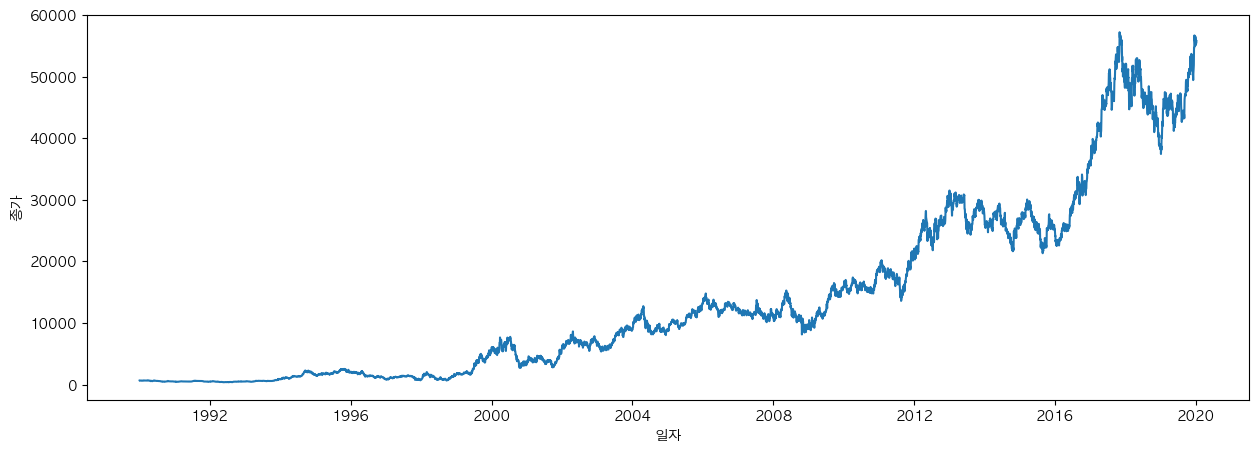

In [16]:
# 일자별 종가기준 확인
plt.figure(figsize=(15,5))
sns.lineplot(x = df['일자'],y = df['종가'],)
plt.show()

In [17]:
# 현재 내림차순으로 되어 있는 df 를 오름차순으로 정렬
df = df.sort_values('일자').reset_index(drop=True)
df

,일자,시가,고가,저가,종가,거래량,연도,월,일
0,1990-01-03,673,689,661,685,1715032,1990,1,3
1,1990-01-04,689,701,685,693,2738562,1990,1,4
2,1990-01-05,689,693,678,678,1790849,1990,1,5
3,1990-01-06,685,689,681,681,1724183,1990,1,6
4,1990-01-08,681,687,673,673,966666,1990,1,8
...,...,...,...,...,...,...,...,...,...
7823,2019-12-30,56200,56600,55700,55800,8356767,2019,12,30
7824,2020-01-02,55500,56000,55000,55200,12993228,2020,1,2
7825,2020-01-03,56000,56600,54900,55500,15422255,2020,1,3
7826,2020-01-06,54900,55600,54600,55500,10278951,2020,1,6


In [19]:
# 일자와 관련된 컬럼을 제외하고 data의 크기 비교 
columns = ['시가','고가','저가','종가','거래량']
df[columns].describe()

# 이걸 본 이유는 거래량과 시,고,저,종 가의 단위 차이가 크기 때문에 표준화가 필요하겠구나 를 보여주려고 찍어주심

,시가,고가,저가,종가,거래량
count,7828.000000,7828.000000,7828.000000,7828.000000,7.828000e+03
mean,13102.048927,13243.941620,12957.559658,13101.641415,1.908968e+07
std,14157.419071,14285.315014,14022.456207,14155.504533,1.722374e+07
min,390.000000,396.000000,387.000000,393.000000,0.000000e+00
25%,1410.000000,1434.000000,1390.000000,1410.000000,8.008238e+06
50%,8865.000000,8960.000000,8745.000000,8860.000000,1.453765e+07
75%,21430.000000,21680.000000,21200.000000,21480.000000,2.546348e+07
max,57500.000000,57520.000000,56760.000000,57220.000000,3.266220e+08


> 거래량과 다른 컬럼의 수치 차이가 크므로 표준화 시도

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [21]:
dfScaled = scaler.fit_transform(df[columns])
dfScaled = pd.DataFrame(dfScaled)
dfScaled.columns = columns
dfScaled

,시가,고가,저가,종가,거래량
0,0.004955,0.005129,0.004860,0.005138,0.005251
1,0.005236,0.005339,0.005286,0.005279,0.008384
2,0.005236,0.005199,0.005162,0.005015,0.005483
3,0.005165,0.005129,0.005215,0.005068,0.005279
4,0.005095,0.005094,0.005073,0.004927,0.002960
...,...,...,...,...,...
7823,0.977237,0.983895,0.981197,0.975012,0.025585
7824,0.964980,0.973391,0.968779,0.964454,0.039781
7825,0.973735,0.983895,0.967005,0.969733,0.047217
7826,0.954474,0.966389,0.961684,0.969733,0.031470


---
### Feature와 Target 만들기

In [25]:
featureNames = ['시가','고가','저가','거래량']
targetName = ['종가']

featrue = dfScaled[featureNames]
target = dfScaled[targetName]

In [26]:
featrue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7828 entries, 0 to 7827
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시가      7828 non-null   float64
 1   고가      7828 non-null   float64
 2   저가      7828 non-null   float64
 3   거래량     7828 non-null   float64
dtypes: float64(4)
memory usage: 244.8 KB


In [27]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7828 entries, 0 to 7827
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종가      7828 non-null   float64
dtypes: float64(1)
memory usage: 61.3 KB


---
### train, test, valid 만들기

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# train과 test 만들기
trainData, testData, trainTarget, testTarget = train_test_split(featrue, target, test_size=0.2) 
#stratify 를 안쓰는 이유는 분류가 아니니깐 = 객관식이 아니라 주관식임 

In [30]:
# 잘 짤라졌나 확인 
print(trainData.shape)
print(testData.shape)
print(trainTarget.shape)
print(testTarget.shape)

(6262, 4)
(1566, 4)
(6262, 1)
(1566, 1)


In [31]:
# create train 과 valid 
x_train, x_valid, y_train, y_valid = train_test_split(trainData, trainTarget, test_size=0.2)

In [32]:

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(5009, 4)
(1253, 4)
(5009, 1)
(1253, 1)


In [36]:
# Random Forest 로 모델 구현
import numpy as np
from sklearn.model_selection import cross_validate # 
from sklearn.ensemble import RandomForestRegressor ## Regressor!

In [37]:
# 이거 써줘야 빨라진다하심
rf = RandomForestRegressor(
    n_jobs = -1, #내 pc에 모든 자원을 다 쓰겠다 멀티 프로세싱과 멀티 핫스킹?? 뭐시기 다 쓴다고 함
                 # 이거 돌리면서 다른것도 해야 되면은 자기 코어? 에 맞춰서 알아서 적어야댐
    random_state = 42, 
)

scores = cross_validate(rf, x_train, y_train, return_train_score=True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/Users/luchesia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/luchesia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/luchesia/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/luchesia/miniforge3/envs/tensorflow/lib

0.9999831892498678 0.9998885185527333
